In [6]:
import os 
import numpy as np 
from pydub import AudioSegment
from pydub.playback import play 
#import ffmpeg
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import wave

# Trimming samples and plotting before and after 

extracting from... /Users/calzada/birdsongs/wood/01_data/laugh_wavs
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/534311411.wav


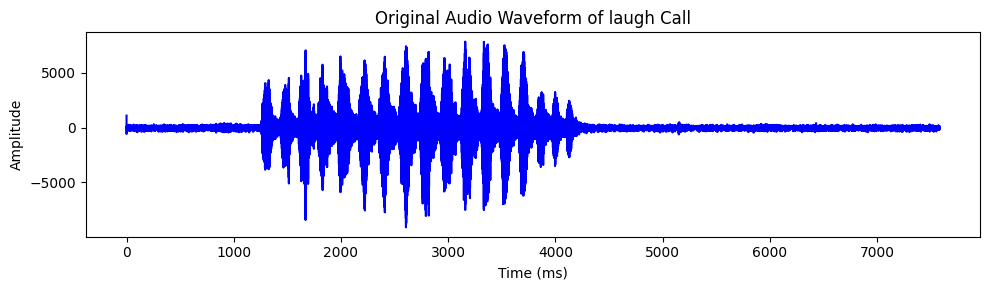

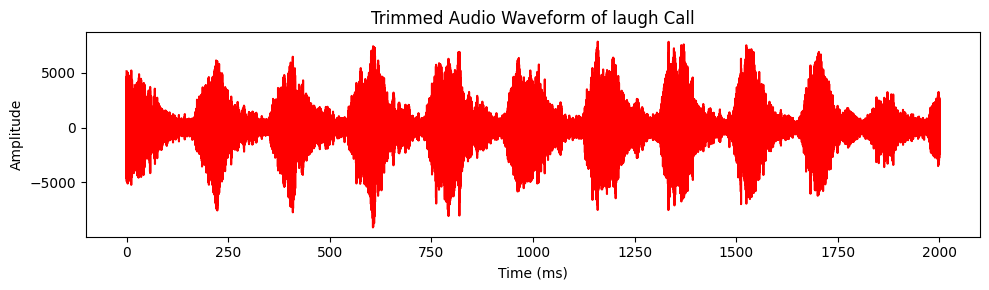

extracting from... /Users/calzada/birdsongs/wood/01_data/drum_wavs
/Users/calzada/birdsongs/wood/01_data/drum_wavs/556412981.wav


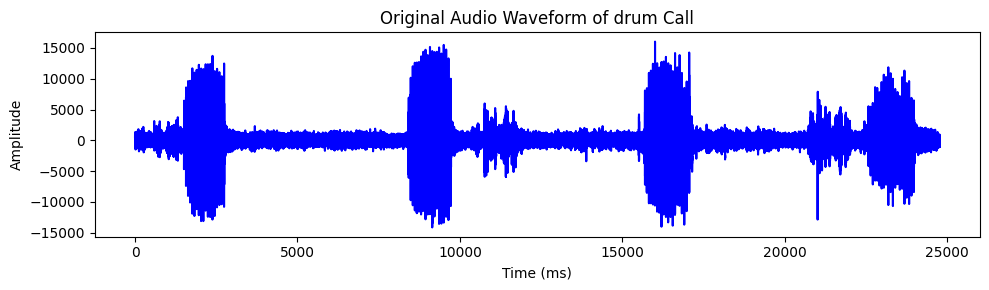

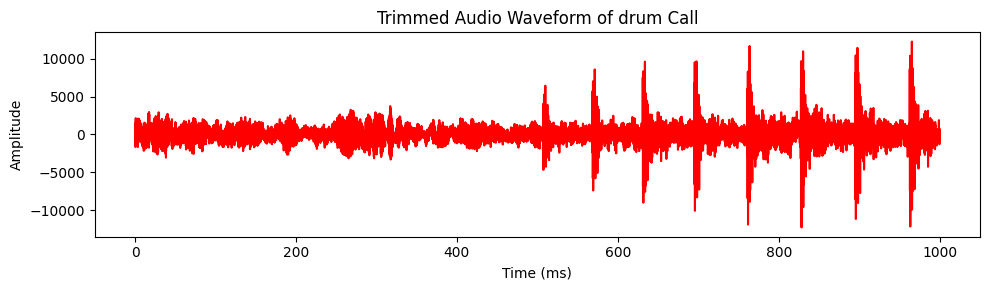

extracting from... /Users/calzada/birdsongs/wood/01_data/pik_wavs
/Users/calzada/birdsongs/wood/01_data/pik_wavs/611874434.wav


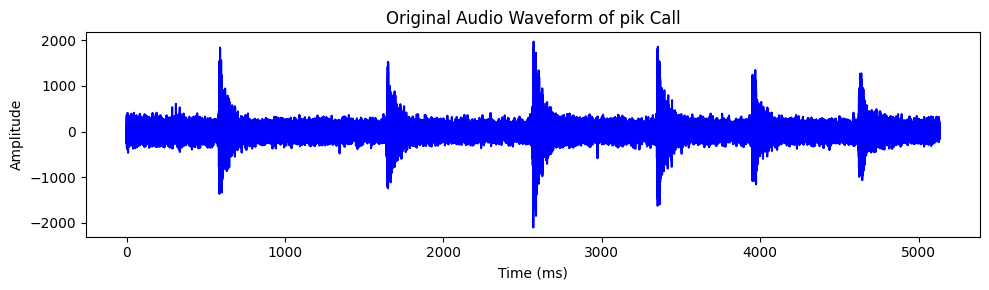

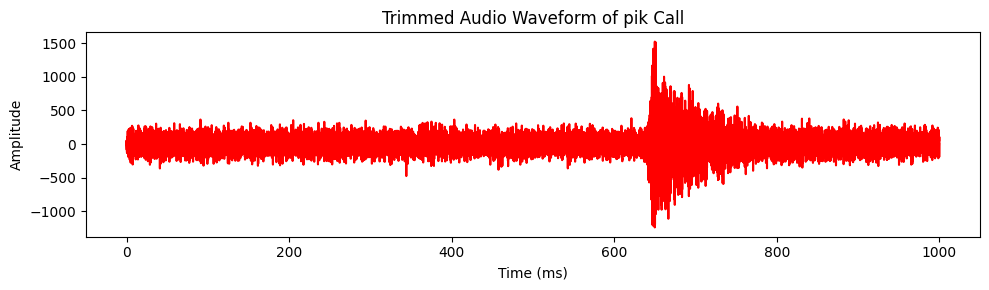

In [7]:
curr_dir = os.getcwd()
dirs = ['laugh_wavs', 'drum_wavs', 'pik_wavs']
start_time = 1
end_time = 2
for direc in dirs:
    new = os.path.join(curr_dir, direc)
    print('extracting from...', new)
    name = (direc.split('_'))[0]
    #print(name)
    waves = [os.path.join(new, x) for x in os.listdir(new)]
    #waves = waves[:3] # can change the number of waves per directory we want to visualize here 
    chosen_wave = np.random.choice(waves, replace = False) # let's choose three random waves from each directory to visualize
    print(chosen_wave)
    audio = AudioSegment.from_file(chosen_wave, format="wav")

    # extract raw audio data (as a numpy array)
    samples = np.array(audio.get_array_of_samples())
    
    # time in ms 
    time = np.arange(0, len(samples)) / audio.frame_rate * 1000
    
    # original audio plot 
    plt.figure(figsize=(10, 3))
    plt.plot(time, samples, color='b')
    plt.title(f'Original Audio Waveform of {name} Call')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()
    
    # trimming
    start_ms = 1000*start_time
    end_ms = 1000*end_time
    trimmed_audio = audio[start_ms:end_ms]
    trimmed_samples = np.array(trimmed_audio.get_array_of_samples())

    # time in ms 
    trimmed_time = np.arange(0, len(trimmed_samples)) / trimmed_audio.frame_rate * 1000
    
    # trimmed audio plot
    plt.figure(figsize=(10, 3))
    plt.plot(trimmed_time, trimmed_samples, color='r')
    plt.title(f'Trimmed Audio Waveform of {name} Call')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

## Function to crop samples to 1 second samples, beginning at the 1s mark and ending at 2s

In [8]:
def crop_wav(input_file, output_file, start_time, end_time):
    # loading in the wav file...
    audio = AudioSegment.from_wav(input_file)
    
    # start and end times in ms 
    start_ms = start_time * 1000
    end_ms = end_time * 1000
    
    cropped_audio = audio[start_ms:end_ms]
    #cropped_audio.export(output_file, format="wav")

In [10]:
curr_dir = os.getcwd()
old_dirs = ['laugh_wavs', 'drum_wavs', 'pik_wavs']
start_time = 1
end_time = 2 

for direc in old_dirs:
    print(f'working on {direc}...')
    
    name = direc.split('_')[0] # 'laugh', 'drum', or 'pik'
    
    new = os.path.join(curr_dir, direc)
    waves = [os.path.join(new, x) for x in os.listdir(new) if x.endswith('.wav')]
    
    for wave in tqdm(waves):
    
        input_file = wave
    
        output_directory = os.path.join(curr_dir, f'clean_{name}')
        out_name = wave.split('/')[-1] # get unique number id 
        output_file = output_directory + f'/trimmed_{out_name}'
        #print(output_file)

        start_time = 1  # start time in seconds
        end_time = 2    # end time in seconds
    
        crop_wav(input_file, output_file, start_time, end_time)

working on laugh_wavs...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:03<00:00, 28.08it/s]


working on drum_wavs...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 53.15it/s]


working on pik_wavs...


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 68.07it/s]


In [11]:
# Function to calculate duration from wave file
def get_wav_duration(file_path):
    with wave.open(file_path, 'rb') as wav_file:
        frames = wav_file.getnframes()
        rate = wav_file.getframerate()
        duration = frames / float(rate)
    return duration

In [12]:
for direc in old_dirs:
    print(f'working on {direc}...')
    #name = direc.split('_')[0] # 'laugh', 'drum', or 'pik'
    new = os.path.join(curr_dir, direc)
    waves = [os.path.join(new, x) for x in os.listdir(new) if x.endswith('.wav')]
    for wav_file in tqdm(waves):
        duration = get_wav_duration(wav_file)
        print(f'{wav_file}: {duration:.2f} seconds')

working on laugh_wavs...


  0%|                                                                                                                                  | 0/96 [00:00<?, ?it/s]


AttributeError: 'str' object has no attribute 'open'

In [13]:
from pydub import AudioSegment
import os

def get_wav_duration(file_path):
    audio = AudioSegment.from_wav(file_path)
    return audio.duration_seconds

for direc in dirs:
    print(f'working on {direc}...')
    new = os.path.join(curr_dir, direc)
    waves = [os.path.join(new, x) for x in os.listdir(new) if x.endswith('.wav')]
    
    for file_path in tqdm(waves):
        try:
            duration = get_wav_duration(file_path)
            print(f'{file_path}: {duration:.2f} seconds')
        except Exception as e:
            print(f'Error processing {file_path}: {e}')

working on laugh_wavs...


 32%|██████████████████████████████████████▊                                                                                 | 31/96 [00:00<00:00, 276.28it/s]

/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609137302.wav: 2.21 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/546095841.wav: 2.63 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/611315769.wav: 2.62 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/528426921.wav: 4.50 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/610208639.wav: 2.36 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/513966371.wav: 3.55 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/532607181.wav: 3.18 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/597654171.wav: 2.30 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609834310.wav: 4.07 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609135510.wav: 2.41 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/610811152.wav: 3.68 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/608437193.wav: 2.25 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/533335161.wav: 2.67 seconds

 84%|█████████████████████████████████████████████████████████████████████████████████████████████████████▎                  | 81/96 [00:00<00:00, 184.53it/s]

/Users/calzada/birdsongs/wood/01_data/laugh_wavs/555374991.wav: 3.07 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/585242401.wav: 29.06 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/613384114.wav: 2.47 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/584571581.wav: 5.26 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/518409381.wav: 2.66 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/517462401.wav: 2.54 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/514618651.wav: 7.32 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/612041866.wav: 2.83 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/611505149.wav: 2.92 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/612659335.wav: 4.37 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/532181851.wav: 4.49 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/541861321.wav: 2.40 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/572677821.wav: 2.69 second

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 96/96 [00:00<00:00, 211.48it/s]


/Users/calzada/birdsongs/wood/01_data/laugh_wavs/542305721.wav: 3.09 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609029053.wav: 4.15 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/496665141.wav: 2.63 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609135320.wav: 2.01 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/596075211.wav: 2.07 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/556611561.wav: 2.50 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609686603.wav: 3.18 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/562916271.wav: 3.20 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/593767481.wav: 3.20 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/565879411.wav: 2.22 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609908151.wav: 5.07 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/611315764.wav: 3.75 seconds
/Users/calzada/birdsongs/wood/01_data/laugh_wavs/609133155.wav: 4.28 seconds

 11%|█████████████                                                                                                             | 3/28 [00:00<00:01, 17.70it/s]

/Users/calzada/birdsongs/wood/01_data/drum_wavs/612611097.wav: 32.86 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/589039401.wav: 109.39 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/534396281.wav: 13.18 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/544869351.wav: 31.69 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/546422771.wav: 98.89 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/559161651.wav: 20.95 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/555301551.wav: 65.45 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/613667238.wav: 55.53 seconds


 36%|███████████████████████████████████████████▏                                                                             | 10/28 [00:00<00:00, 36.20it/s]

/Users/calzada/birdsongs/wood/01_data/drum_wavs/615978417.wav: 9.26 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/578716631.wav: 20.11 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/569372771.wav: 2.48 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/576688941.wav: 45.49 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/608516473.wav: 10.50 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/531414841.wav: 9.00 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/561957241.wav: 7.00 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/551720221.wav: 183.96 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/556649231.wav: 3.24 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/539778701.wav: 9.31 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/556704291.wav: 20.38 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/544520671.wav: 16.05 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/554516391.wav: 21.99 seconds


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 55.88it/s]


/Users/calzada/birdsongs/wood/01_data/drum_wavs/560366301.wav: 13.08 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/570486411.wav: 15.54 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/556412981.wav: 24.77 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/560824051.wav: 28.86 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/551726431.wav: 9.67 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/556412951.wav: 23.17 seconds
/Users/calzada/birdsongs/wood/01_data/drum_wavs/557655021.wav: 32.04 seconds
working on pik_wavs...


 33%|████████████████████████████████████████                                                                                | 12/36 [00:00<00:00, 114.67it/s]

/Users/calzada/birdsongs/wood/01_data/pik_wavs/612959583.wav: 12.98 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/564833211.wav: 11.07 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/513271751.wav: 11.52 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/613669818.wav: 7.10 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/522725601.wav: 30.18 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/519072681.wav: 7.12 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/612276363.wav: 38.86 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/508251571.wav: 13.72 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/609431998.wav: 7.29 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/611874434.wav: 5.13 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/518754901.wav: 15.92 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/592245551.wav: 45.80 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/611598666.wav: 12.44 seconds
/Users/calzada/b

 92%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▉          | 33/36 [00:00<00:00, 72.60it/s]

/Users/calzada/birdsongs/wood/01_data/pik_wavs/609436518.wav: 25.34 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/548045181.wav: 11.02 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/612836674.wav: 23.31 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/557992921.wav: 8.26 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/512308701.wav: 30.79 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/516760751.wav: 24.31 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/533682381.wav: 2.32 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/615968801.wav: 13.96 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/595784751.wav: 19.45 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/612168160.wav: 15.36 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/510067071.wav: 18.63 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/609638039.wav: 5.56 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/512876581.wav: 11.08 seconds
/Users/calzada/

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36/36 [00:00<00:00, 67.62it/s]

/Users/calzada/birdsongs/wood/01_data/pik_wavs/592232171.wav: 80.55 seconds
/Users/calzada/birdsongs/wood/01_data/pik_wavs/608951708.wav: 12.19 seconds


In [1]:
import numpy as np
import librosa
import soxr

# Load audio data
audio, sr = librosa.load('/Users/calzada/birdsongs/wood/01_data/pik_wavs/512876581.wav', sr=None)

start_time = 1  # in seconds
end_time = 2   # in seconds
trimmed_audio = audio[int(start_time*sr):int(end_time*sr)]

# Save trimmed audio to a new file
#librosa.output.write_wav('/path/to/trimmed_audio.wav', trimmed_audio, sr)

In [15]:
import librosa
wave = librosa.load('/Users/calzada/birdsongs/wood/01_data/laugh_wavs/610410276.wav')
